In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

DATA_ROOT = Path("../data/raw/barber")
SEC_PATH  = DATA_ROOT / "23_AnalysisEnduranceWithSections_Race 2_Anonymized.CSV"

print("Using:", SEC_PATH, "exists? ->", SEC_PATH.exists())

df_sec = pd.read_csv(SEC_PATH, sep=";")
df_sec.columns = df_sec.columns.str.strip()
print(df_sec.shape)
print([repr(c) for c in df_sec.columns])
df_sec.head()

Using: ../data/raw/barber/23_AnalysisEnduranceWithSections_Race 2_Anonymized.CSV exists? -> True
(602, 39)
["'NUMBER'", "'DRIVER_NUMBER'", "'LAP_NUMBER'", "'LAP_TIME'", "'LAP_IMPROVEMENT'", "'CROSSING_FINISH_LINE_IN_PIT'", "'S1'", "'S1_IMPROVEMENT'", "'S2'", "'S2_IMPROVEMENT'", "'S3'", "'S3_IMPROVEMENT'", "'KPH'", "'ELAPSED'", "'HOUR'", "'S1_LARGE'", "'S2_LARGE'", "'S3_LARGE'", "'TOP_SPEED'", "'PIT_TIME'", "'CLASS'", "'GROUP'", "'MANUFACTURER'", "'FLAG_AT_FL'", "'S1_SECONDS'", "'S2_SECONDS'", "'S3_SECONDS'", "'IM1a_time'", "'IM1a_elapsed'", "'IM1_time'", "'IM1_elapsed'", "'IM2a_time'", "'IM2a_elapsed'", "'IM2_time'", "'IM2_elapsed'", "'IM3a_time'", "'IM3a_elapsed'", "'FL_time'", "'FL_elapsed'"]


,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,...,IM1_time,IM1_elapsed,IM2a_time,IM2a_elapsed,IM2_time,IM2_elapsed,IM3a_time,IM3a_elapsed,FL_time,FL_elapsed
0,3,1,1,1:45.342,0,NaN,31.243,0,44.136,0,...,10.118,31.243,31.093,1:02.336,13.043,1:15.379,11.634,1:27.013,18.329,1:45.342
1,3,1,2,1:39.505,0,NaN,27.260,0,43.038,0,...,9.921,27.260,30.252,57.512,12.786,1:10.298,11.170,1:21.468,18.037,1:39.505
2,3,1,3,1:39.249,0,NaN,27.164,0,42.982,0,...,9.880,27.164,30.177,57.341,12.805,1:10.146,11.124,1:21.270,17.979,1:39.249
3,3,1,4,1:39.640,0,NaN,26.972,0,43.276,0,...,9.839,26.972,30.438,57.410,12.838,1:10.248,11.220,1:21.468,18.172,1:39.640
4,3,1,5,1:39.275,0,NaN,26.999,0,43.309,0,...,9.913,26.999,30.547,57.546,12.762,1:10.308,11.049,1:21.357,17.918,1:39.275


In [2]:
VEH_COL = "NUMBER"
LAP_COL = "LAP_NUMBER"

S1_COL = "S1_SECONDS"
S2_COL = "S2_SECONDS"
S3_COL = "S3_SECONDS"

df_sec["S1_s"] = df_sec[S1_COL].astype(float)
df_sec["S2_s"] = df_sec[S2_COL].astype(float)
df_sec["S3_s"] = df_sec[S3_COL].astype(float)

In [3]:
sector_stats = (
    df_sec
    .groupby(VEH_COL)[["S1_s", "S2_s", "S3_s"]]
    .agg(["mean", "min"])
)

sector_stats.columns = [
    f"{sec}_{stat}" for (sec, stat) in sector_stats.columns.to_flat_index()
]
sector_stats = sector_stats.reset_index()
sector_stats.head()

,NUMBER,S1_s_mean,S1_s_min,S2_s_mean,S2_s_min,S3_s_mean,S3_s_min
0,2,26.891786,26.629,42.596893,42.314,28.844179,28.565
1,3,27.242679,26.886,43.127464,42.811,29.281929,28.967
2,5,26.971607,26.638,42.832536,42.560,29.126714,28.865
3,7,26.972500,26.650,42.857857,42.476,29.031964,28.820
4,13,26.720857,26.544,42.379357,42.197,28.650286,28.332


In [4]:
CAR_NUM = 2
sector_stats["is_our_car"] = sector_stats[VEH_COL] == CAR_NUM

/Users/macbook/Desktop/FPTAI/DataScienceHackbyToyota/tmp/ipykernel_7648/4145945437.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(vals, vert=True, labels=[sec])
/Users/macbook/Desktop/FPTAI/DataScienceHackbyToyota/tmp/ipykernel_7648/4145945437.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(vals, vert=True, labels=[sec])
/Users/macbook/Desktop/FPTAI/DataScienceHackbyToyota/tmp/ipykernel_7648/4145945437.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(vals, vert=True, labels=[sec])


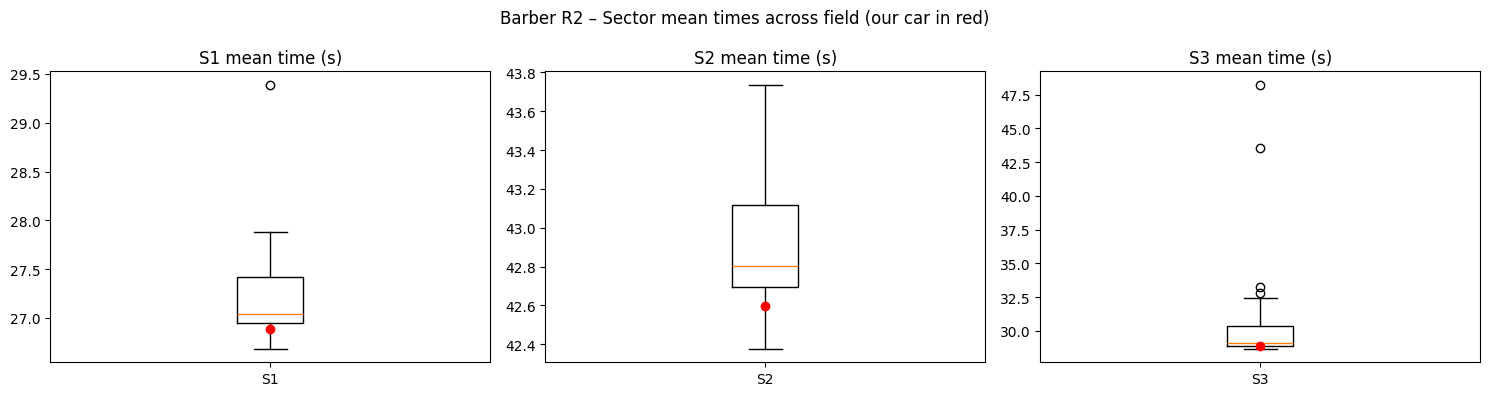

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=False)

for i, (sec, col) in enumerate([("S1", "S1_s_mean"),
                                ("S2", "S2_s_mean"),
                                ("S3", "S3_s_mean")]):
    ax = axes[i]
    vals = sector_stats[col]
    ax.boxplot(vals, vert=True, labels=[sec])

    our_val = sector_stats.loc[sector_stats["is_our_car"], col].iloc[0]
    ax.scatter(1, our_val, color="red", zorder=3)
    ax.set_title(f"{sec} mean time (s)")

plt.suptitle("Barber R2 – Sector mean times across field (our car in red)")
plt.tight_layout()
plt.show()

### **Interpretation**:
 S1 – 26.89 s (rank 4/20) Our car is solidly in the front group in Sector 1. The red dot sits near the lower edge of the box, meaning we’re quicker than most of the field here.
	•	S2 – 42.97 s (rank 4/20)
Again top-4 in the field. The distribution is a bit wider, but our average is on the fast side of the pack, so we’re competitive through the middle of the lap.
	•	S3 – 28.84 s (rank 5/20)
Still top-5, with our dot tucked near the lower part of the S3 box. We’re not the absolute quickest, but we’re clearly in the fast cluster.

Overall: in Barber R2, car #2 is consistently a front-group car in all three sectors (ranks 4–5 everywhere). There’s no single “problem” sector; the driver is broadly strong around the whole lap, which is great for strategy modelling because we can assume competitive pace throughout the circuit.

In [8]:
def rank_column(colname: str) -> int:
    return (
        sector_stats[colname]
        .rank(method="min")
        .loc[sector_stats["is_our_car"]]
        .iloc[0]
    )

our_summary_r2 = pd.DataFrame([{
    "car_number": CAR_NUM,
    "S1_mean_s": sector_stats.loc[sector_stats["is_our_car"], "S1_s_mean"].iloc[0],
    "S1_mean_rank": rank_column("S1_s_mean"),
    "S2_mean_s": sector_stats.loc[sector_stats["is_our_car"], "S2_s_mean"].iloc[0],
    "S2_mean_rank": rank_column("S2_s_mean"),
    "S3_mean_s": sector_stats.loc[sector_stats["is_our_car"], "S3_s_mean"].iloc[0],
    "S3_mean_rank": rank_column("S3_s_mean"),
}])

our_summary_r2

,car_number,S1_mean_s,S1_mean_rank,S2_mean_s,S2_mean_rank,S3_mean_s,S3_mean_rank
0,2,26.891786,4.0,42.596893,4.0,28.844179,5.0


In [7]:
OUT_DIR = Path("../data/processed/barber")
OUT_DIR.mkdir(parents=True, exist_ok=True)

sector_stats.to_csv(OUT_DIR / "barber_r2_sector_stats_all_cars.csv", index=False)
our_summary_r2.to_csv(OUT_DIR / "barber_r2_car2_sector_summary.csv", index=False)